# Online News Popularity Prediction

<font color="green">**A regression analysis of the popularity of online news articles based on various features**</font>

### Introduction

<font color="green">**The project will help online news companies to predict news popularity before publication. The dataset used is the Online News Popularity Data Set from the UCI Machine Learning Repository1(<href>https://archive.ics.uci.edu/dataset/332/online+news+popularity</href>). The notebook explores the data using descriptive statistics and visualizations, and then applies different machine learning models**</font>

### Goal

<font color="green">**To predict the popularity of online news articles, measured by factors like reads, likes, and shares, we aim to leverage machine learning techniques to identify which stories are likely to gain recognition. Our project analyzes a dataset of 39,643 articles from the website Mashable, focusing on developing a simple yet effective classification algorithm to predict the likelihood of an article becoming popular even before its publication. By optimizing for accuracy and simplicity, our goal is to provide a reliable model that can assist in content strategy and decision-making for online news platforms.**</font>

# Importing Libraries

In [145]:
import warnings # For warning handling

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from scipy.stats import zscore
# For warning handling
warnings.filterwarnings('ignore') # For ignoring warnings

# Importing Dataset

In [36]:
df = pd.read_csv("OnlineNewsPopularity.csv")  #Reading Dataset from csv file

<font color="green">**This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity)**</font>

# Data Insights

In [37]:
df.head()  #First 5 rows in the dataset

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [38]:
df.describe().T.round(2) #Descriptive statistics of Numerical data

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.53,214.16,8.00,164.00,339.00,542.00,731.00
n_tokens_title,39644.0,10.40,2.11,2.00,9.00,10.00,12.00,23.00
n_tokens_content,39644.0,546.51,471.11,0.00,246.00,409.00,716.00,8474.00
n_unique_tokens,39644.0,0.55,3.52,0.00,0.47,0.54,0.61,701.00
n_non_stop_words,39644.0,1.00,5.23,0.00,1.00,1.00,1.00,1042.00
n_non_stop_unique_tokens,39644.0,0.69,3.26,0.00,0.63,0.69,0.75,650.00
num_hrefs,39644.0,10.88,11.33,0.00,4.00,8.00,14.00,304.00
num_self_hrefs,39644.0,3.29,3.86,0.00,1.00,3.00,4.00,116.00
num_imgs,39644.0,4.54,8.31,0.00,1.00,1.00,4.00,128.00
num_videos,39644.0,1.25,4.11,0.00,0.00,0.00,1.00,91.00


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

<font color="green">**This dataset provides insights into online news popularity, inclusive 39644 entries and 60 attributes. Our target column is **</font>
<font color="red">**'Shares'**</font>

print("The shape =", df.shape)

# Dataset dimensions and statistics
num_rows, num_cols = df.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")

# Data Preprocessing

### Checking null values

In [41]:
df.isnull().sum()  #Checking count of null values in each column

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

<font color="green">**The dataset doesn't contain any null values!!**</font>

### Checking duplicated rows

In [42]:
df.duplicated().sum() #Checking whether duplicated rows presents in the dataset

0

<font color="green">**As there is no duplicated rows exists, no need to handle it!!**</font>

### Rename columns

In [95]:
df.rename(columns={' shares' : 'Shares'}, inplace=True)

<font color="green">**As the shares column consists of a space in the beginning, we removed it for the ease of further analysis**</font>

### Encoding Categorical Variables

In [118]:
label_encoder = LabelEncoder()
df['url_encoded'] = label_encoder.fit_transform(df['url'])
df.drop(columns = 'url',inplace = True)

<font color="green">**The only categorical column in the dataset is 'url'. We encoded it using the label encoding method as it is not heirarcical**</font>

### Data Visualization

#### Overall Popularity analysis

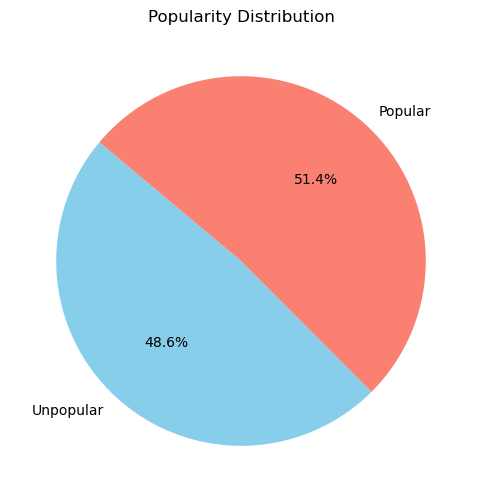

In [129]:
unpopular = df[df['Shares']<1400]
popular = df[df['Shares']>1400]
df1=[len(unpopular),len(popular)]
labels = ['Unpopular','Popular']
colors = ['skyblue', 'salmon']
plt.figure(figsize=(6, 6))
plt.pie(df1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Popularity Distribution')
plt.show()

#### Popularity Analysis over Days of Week

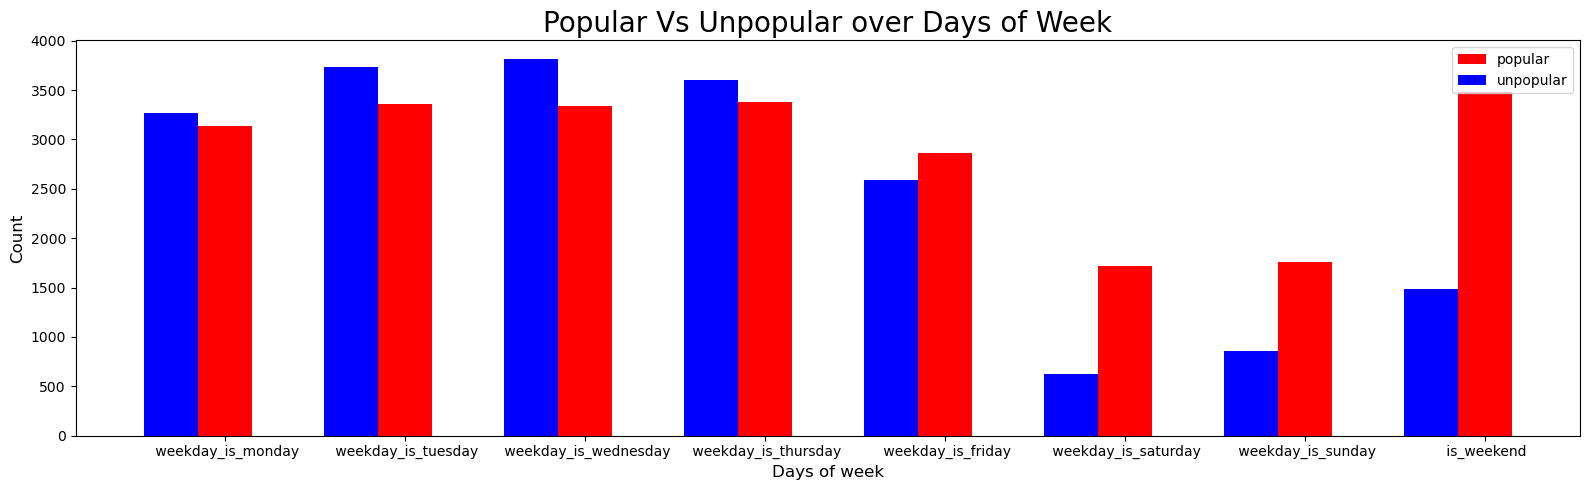

In [102]:
columns_day = df.columns.values[31:39]
unpopular = df[df['Shares']<1400]
popular = df[df['Shares']>1400]
unpopular_day = unpopular[columns_day].sum().values
popular_day = popular[columns_day].sum().values

plt.figure(figsize = (16,5))
plt.title('Popular Vs Unpopular over Days of Week', fontsize=20)
plt.bar(np.arange(len(columns_day)),popular_day, width=0.3, align="center", color='r',label = 'popular')
plt.bar(np.arange(len(columns_day)) - 0.3, unpopular_day, width=0.3, align="center", color='b', label='unpopular')

plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

#### Popularity Analysis over Channel Category

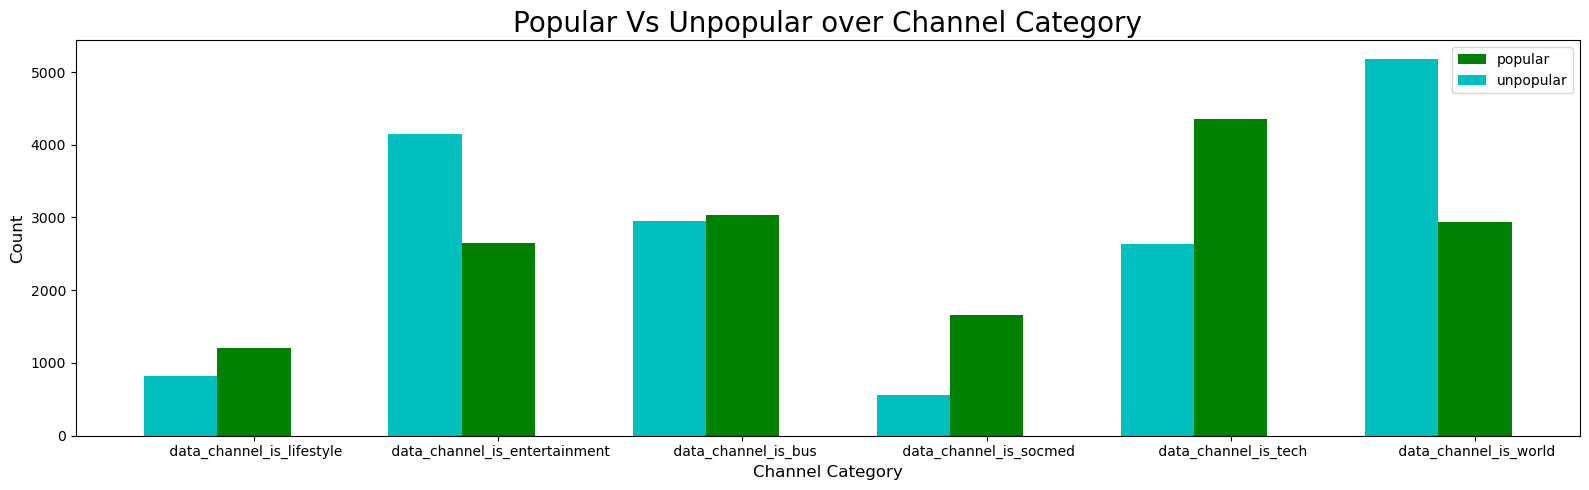

In [109]:
columns_channel = df.columns.values[13:19]
unpopular_channel = unpopular[columns_channel].sum().values
popular_channel = popular[columns_channel].sum().values

plt.figure(figsize = (16,5))
plt.title('Popular Vs Unpopular over Channel Category', fontsize=20)
plt.bar(np.arange(len(columns_channel)),popular_channel, width=0.3, align="center", color='g',label = 'popular')
plt.bar(np.arange(len(columns_channel)) - 0.3, unpopular_channel, width=0.3, align="center", color='c', label='unpopular')

plt.xticks(np.arange(len(columns_channel)), columns_channel)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Channel Category", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

#### Correlation Heatmap

In [158]:
corr1 = df.corr()
corr1

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Shares,url_encoded
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662,-0.998599
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783,0.240772
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459,0.059771
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806,-0.003018
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443,-0.000328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
title_sentiment_polarity,0.038711,0.000240,0.023358,-0.002333,-0.001650,-0.002910,0.039041,0.026224,0.046310,0.021980,...,0.076898,0.085878,0.078795,-0.000470,0.232130,1.000000,-0.240112,0.410205,0.012772,-0.038318
abs_title_subjectivity,0.011551,-0.146954,0.007136,-0.009242,-0.008511,-0.008572,0.009443,0.008961,-0.013759,-0.021982,...,-0.017131,-0.006573,-0.010531,-0.001877,-0.487172,-0.240112,1.000000,-0.400272,0.001481,-0.011032
abs_title_sentiment_polarity,-0.002745,0.040550,0.013439,-0.004217,-0.004391,-0.005342,0.056525,-0.006709,0.063307,0.055231,...,0.082966,-0.075594,-0.058398,-0.017444,0.714528,0.410205,-0.400272,1.000000,0.027135,0.002756
Shares,0.008662,0.008783,0.002459,0.000806,0.000443,0.000114,0.045404,-0.001900,0.039388,0.023936,...,0.010068,-0.032029,-0.019297,-0.019300,0.021967,0.012772,0.001481,0.027135,1.000000,-0.009739


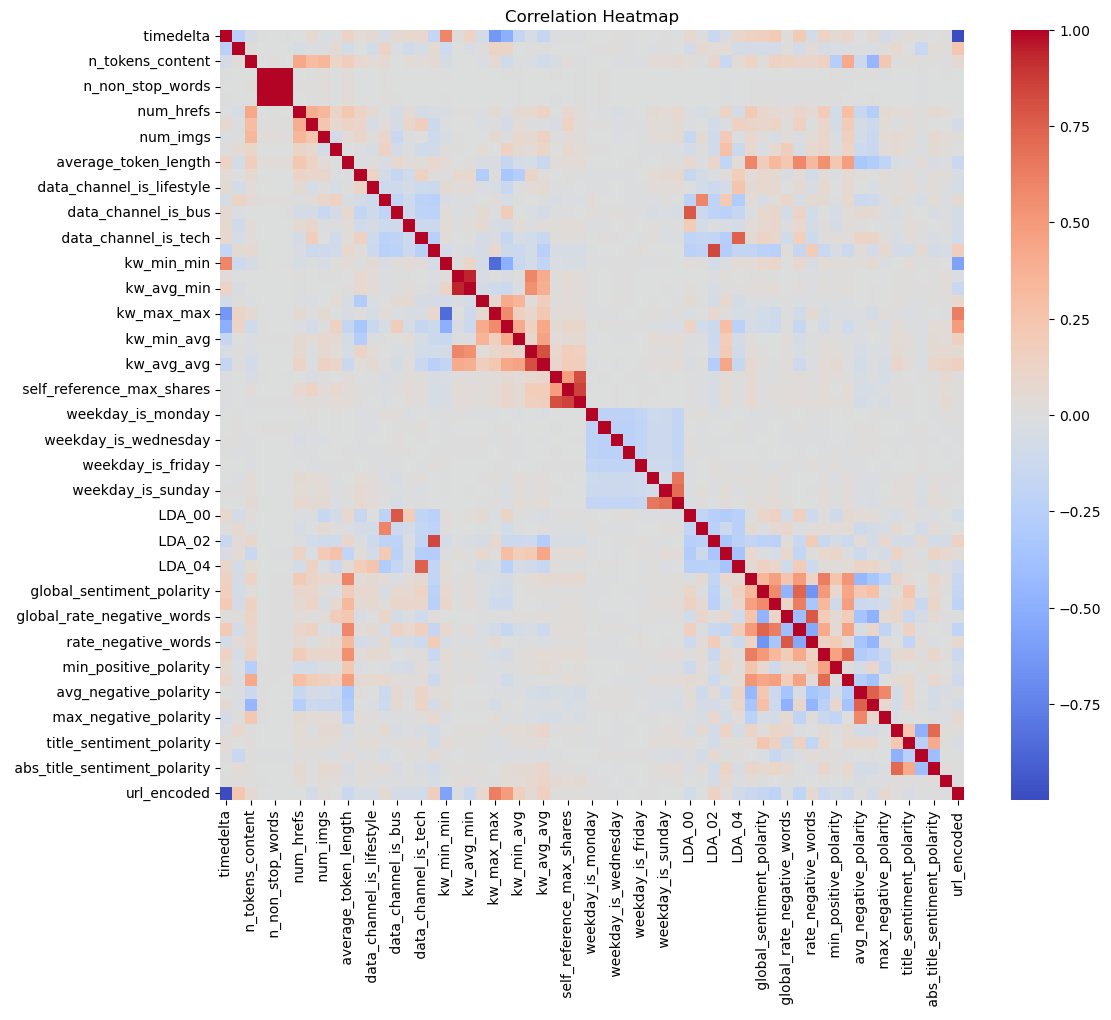

In [119]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

#### Distribution of shares

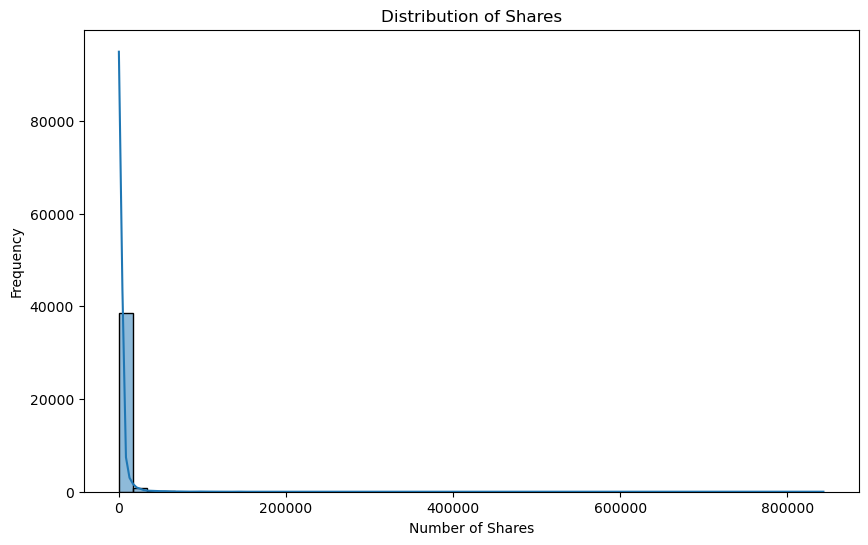

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Shares'], bins=50, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.show()

# Outlier Detection

#### Skewness Calculation

In [130]:
print("Skewness : ")
for col in df.columns:
    print(f"{col} : {df[col].skew()}")

Skewness : 
 timedelta : 0.12050427403732356
 n_tokens_title : 0.16532037674928027
 n_tokens_content : 2.9454219387867084
 n_unique_tokens : 198.65511559825592
 n_non_stop_words : 198.7924453768874
 n_non_stop_unique_tokens : 198.44329440926512
 num_hrefs : 4.013494828201318
 num_self_hrefs : 5.172751105757634
 num_imgs : 3.9465958446535474
 num_videos : 7.0195327862958665
 average_token_length : -4.57601155020474
 num_keywords : -0.14725125199950523
 data_channel_is_lifestyle : 3.9930191433554167
 data_channel_is_entertainment : 1.68358480940472
 data_channel_is_bus : 1.8768701859879158
 data_channel_is_socmed : 3.758879630973088
 data_channel_is_tech : 1.6199757646890423
 data_channel_is_world : 1.4051693841208097
 kw_min_min : 2.3749472801825444
 kw_max_min : 35.32843373115432
 kw_avg_min : 31.306108102660584
 kw_min_max : 10.386371634782769
 kw_max_max : -2.6449817621966782
 kw_avg_max : 0.6243096463608944
 kw_min_avg : 0.4679758464905322
 kw_max_avg : 16.41166955537124
 kw_avg_avg

<font color="green">**Column 'Shares' have a greater value of skewness, which is 33.96**</font>

#### Boxplot

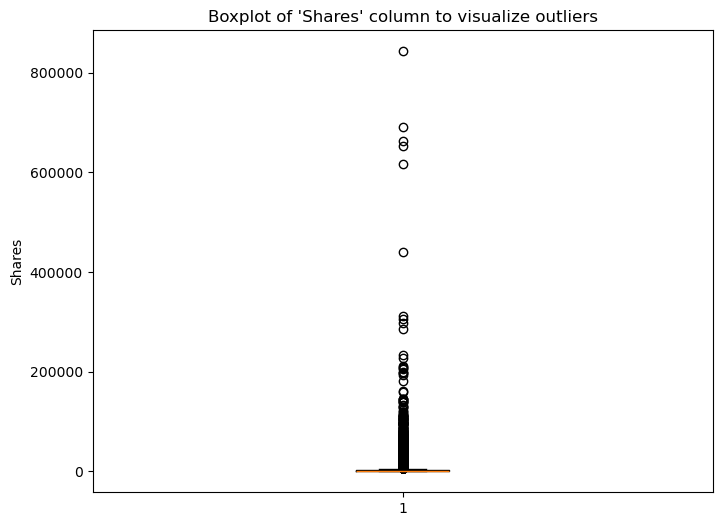

In [134]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Shares'])
plt.title("Boxplot of 'Shares' column to visualize outliers")
plt.ylabel("Shares")
plt.show()

In [153]:
# Calculate the Z-scores for each numerical column
z_scores = np.abs(df.apply(zscore))

# Define the threshold for outliers
threshold = 3

# Filter out rows where any column has a Z-score above the threshold
df_no_outliers = df[(z_scores < threshold).all(axis=1)]
print("length of dataset with outliers",len(df))
print("length of dataset with no outliers",len(df_no_outliers))

length of dataset with outliers 39644
length of dataset with no outliers 21009


<font color="green">**Hence removed outliers!!**</font>